## Importación librerias y dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data\players_total2.csv')

## Visualización de las variables numéricas

In [3]:
#ver las variables numéricas
pd.set_option('display.max_columns', None)
print(df.select_dtypes(include=np.number).columns.tolist())

['Unnamed: 0', 'Unnamed: 0.1', 'sofifa_id', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id', 'league_level', 'club_jersey_number', 'club_contract_valid_until', 'nationality_id', 'nation_team_id', 'nation_jersey_number', 'weak_foot', 'skill_moves', 'international_reputation', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking

## Funciones

In [4]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [5]:
def outliers(column):
    lower_range,upper_range = outlier_treatment(column)
    out_inf=df[column<lower_range].count()[0]
    out_sup=df[column>upper_range].count()[0]
    return f'Hay {out_inf} outliers por debajo de {lower_range} y {out_sup} outliers por encima de {upper_range}.' 

In [6]:
def outlier_detector(col,n_outliers):
    '''Detecta los outliers en funcion del percentil. 
    Si está por encima del percil 99% o per debajo del 1%
    
    Sample input: ('edad',5)
    Sample output: fila con 5 outliers por edad
    '''
    
    
    q_low = df[col].quantile(0.01)
    q_hi  = df[col].quantile(0.99)
    
    while True:
        try:
            p=input('¿Qué quieres obtener el outiler inferior (I) o el superior (S)?')
            if p =="I":
                return df[df[col] < q_low].sort_values(by=[col],ascending=True).head(n_outliers)
            elif p=="S":
                return df[df[col] > q_hi].sort_values(by=[col],ascending=False).head(n_outliers)
        except:
            pass


## Analisis variables numéricas

### Variable Age

<AxesSubplot:>

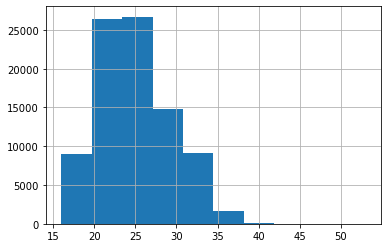

In [7]:
df['age'].hist()

<AxesSubplot:xlabel='age'>

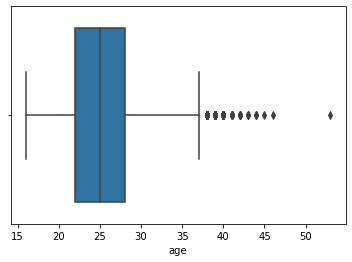

In [8]:
sns.boxplot(x=df['age'],whis=1.5)

In [9]:
outliers(df['age'])

'Hay 0 outliers por debajo de 13.0 y 257 outliers por encima de 37.0.'

In [10]:
df[df['age']>=40].count()[0]

52

In [11]:
'''Podemos considerar que a partir de los 40 años de edad tenemos 52 outliers. 
Si la edad es una variable relevante podemos decidir eliminar estos outliers para que no distorsionen la prevision'''

'Podemos considerar que a partir de los 40 años de edad tenemos 52 outliers. \nSi la edad es una variable relevante podemos decidir eliminar estos outliers para que no distorsionen la prevision'

### Variable Height_cm

<AxesSubplot:xlabel='height_cm'>

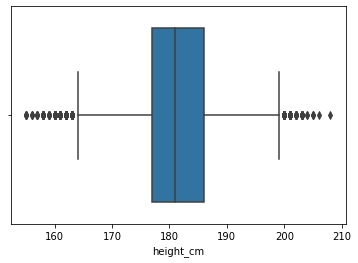

In [12]:
sns.boxplot(x=df['height_cm'])

In [13]:
outliers(df['height_cm'])

'Hay 249 outliers por debajo de 163.5 y 126 outliers por encima de 199.5.'

In [14]:
# Mejor no eliminar estos outliers porque son características físicas que pueden ir bien para una determinada posición (GK)

### Variable weight_kg

<AxesSubplot:xlabel='weight_kg'>

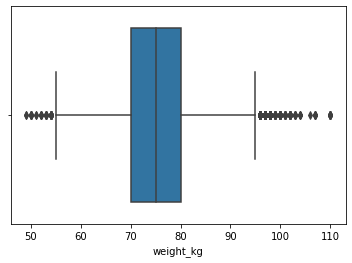

In [15]:
sns.boxplot(x=df['weight_kg'])

In [16]:
outliers(df['weight_kg'])

'Hay 42 outliers por debajo de 55.0 y 295 outliers por encima de 95.0.'

<AxesSubplot:xlabel='weight_kg', ylabel='height_cm'>

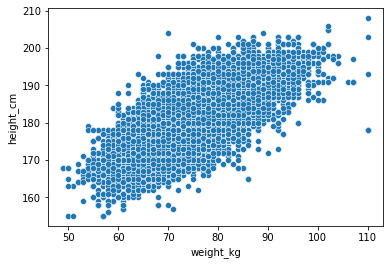

In [17]:
sns.scatterplot(data=df,x='weight_kg',y='height_cm')
#vemos que hay una correlacion entre peso y altura

In [18]:
# buscamos el outlier de height & weight
df[(df['weight_kg']>=110)&(df['height_cm']<=180)]

,Unnamed: 0,Unnamed: 0.1,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,año_version,progresion_anual
7422,9377,9377,156321,A. Akinfenwa,Saheed Adebayo Akinfenwa,ST,62,62,275000.0,2000.0,32,1982-05-10,178,110,112259.0,AFC Wimbledon,English League Two,4.0,RS,10.0,NaN,2014-06-20,2015.0,14,England,NaN,NaN,NaN,Right,3,2,1,Low/Low,Stocky (170-185),No,NaN,#Strength,NaN,50.0,59.0,53.0,61.0,34.0,78.0,38,63,68,59,58,60,49,41,49,69,45,54,41,59,70,54,57,59,97,49,59,25,67,64,66,NaN,25,40,25,13,6,14,5,15,NaN,62,62,62,56,60,60,60,56,60,60,60,56,56,56,56,56,45,52,52,52,45,44,48,48,48,44,13,2015,0.032258
18450,24934,8779,156321,A. Akinfenwa,Saheed Adebayo Akinfenwa,ST,64,64,300000.0,2000.0,33,1982-05-10,178,110,112259.0,AFC Wimbledon,English League Two,4.0,LS,10.0,NaN,2014-06-20,2016.0,14,England,NaN,NaN,NaN,Right,3,2,1,Low/Low,Unique,Yes,NaN,#Strength,NaN,49.0,60.0,54.0,62.0,35.0,81.0,39,64,69,60,59,61,50,42,50,71,45,52,32,60,70,55,57,69,98,50,60,17,68,65,67,NaN,32,41,24,14,7,15,6,16,NaN,64,64,64,58,62,62,62,58,61,61,61,59,59,59,59,59,46,50,50,50,46,44,49,49,49,44,16,2016,0.000000
31262,42396,10618,156321,A. Akinfenwa,Saheed Adebayo Akinfenwa,ST,64,64,230000.0,7000.0,34,1982-05-10,178,110,1933.0,Wycombe Wanderers,English League Two,4.0,SUB,20.0,NaN,2016-07-10,2017.0,14,England,NaN,NaN,NaN,Right,3,2,1,Low/Low,Unique,Yes,NaN,#Strength,"Backs Into Player, Target Forward",45.0,60.0,51.0,60.0,35.0,80.0,39,64,68,56,59,59,50,42,47,69,41,49,29,61,70,57,50,63,98,50,63,17,68,62,66,70.0,33,40,24,14,7,15,6,16,NaN,63+1,63+1,63+1,57,61,61,61,57,59+1,59+1,59+1,57+1,56+1,56+1,56+1,57+1,44+1,48+1,48+1,48+1,44+1,43+1,48+1,48+1,48+1,43+1,16+1,2017,0.000000
43850,60285,10911,156321,A. Akinfenwa,Saheed Adebayo Akinfenwa,ST,64,64,210000.0,5000.0,35,1982-05-10,178,110,1933.0,Wycombe Wanderers,English League Two,4.0,ST,20.0,NaN,2016-07-10,2018.0,14,England,NaN,NaN,NaN,Right,3,2,1,Low/Low,Unique,Yes,368000.0,#Strength,"Power Header, Backs Into Player, Target Forward",45.0,61.0,51.0,56.0,35.0,80.0,39,64,71,56,59,52,50,42,47,69,41,49,29,61,70,61,50,63,98,51,63,17,68,62,66,70.0,33,40,24,14,7,15,6,16,NaN,63+1,63+1,63+1,56,60,60,60,56,58+1,58+1,58+1,56+1,56+1,56+1,56+1,56+1,44+1,48+1,48+1,48+1,44+1,43+1,48+1,48+1,48+1,43+1,16+1,2018,0.031250
55238,76015,8687,156321,A. Akinfenwa,Saheed Adebayo Akinfenwa,ST,66,66,230000.0,3000.0,36,1982-05-10,178,110,1933.0,Wycombe Wanderers,English League One,3.0,ST,20.0,NaN,2016-07-10,2022.0,14,England,NaN,NaN,NaN,Right,3,2,1,Low/Low,Unique,Yes,403000.0,#Strength,"Injury Free, Power Header, Backs Into Player, ...",44.0,64.0,53.0,57.0,33.0,83.0,39,66,71,59,59,52,50,42,47,69,38,49,35,61,71,70,49,77,97,54,66,17,71,62,66,70.0,27,40,24,14,7,15,6,16,NaN,65+1,65+1,65+1,57,61,61,61,57,59+1,59+1,59+1,57+1,58+1,58+1

In [19]:
# lo comprobamos:
#df.drop(df[(df['weight_kg']>=110)&(df['height_cm']<=180)].index, inplace=True)['weight_kg'].corr(df.drop(df[(df['weight_kg']>=110)&(df['height_cm']<=180)].index, inplace=True)['height_cm'])
df['weight_kg'].corr(df['height_cm'])

0.7642825221293341

In [20]:
'''Hay alta correlación entre weight y height. Podríamos juntas las 2 o eliminar 1 y calcular los outliers de la nueva 
variable. Si la nueva variable pesa en la predicción podemos probar a eliminar los outliers por si distorsionan.'''

'Hay alta correlación entre weight y height. Podríamos juntas las 2 o eliminar 1 y calcular los outliers de la nueva \nvariable. Si la nueva variable pesa en la predicción podemos probar a eliminar los outliers por si distorsionan.'

### Variable skill_moves

In [21]:
df['skill_moves'].unique() #Variable de clasificación => no hay outliers

array([4, 5, 1, 3, 2], dtype=int64)

### Variable international_reputation

In [22]:
df['international_reputation'].unique() #Variable de clasificación => no hay outliers

array([5, 4, 3, 2, 1], dtype=int64)

### Variable release_clause_eur

<AxesSubplot:xlabel='release_clause_eur'>

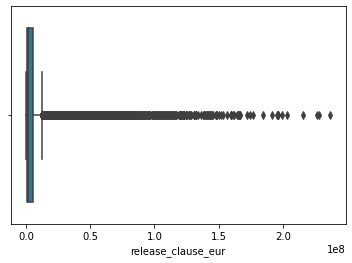

In [23]:
sns.boxplot(x=df[df['release_clause_eur'].fillna(0)>0]['release_clause_eur']) #vemos que hay muchos outliers

In [24]:
outliers(df['release_clause_eur'].fillna(0))

'Hay 0 outliers por debajo de -2700000.0 y 13434 outliers por encima de 4500000.0.'

## Variables que no afectan a porteros (GK)

In [25]:
df=df[df['player_positions']!='GK']

### Variable pace

<AxesSubplot:xlabel='pace'>

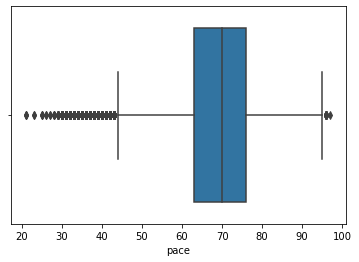

In [26]:
sns.boxplot(x=df['pace']) #los porteros no tienen pace

In [27]:
outliers(df['pace'])

'Hay 1995 outliers por debajo de 43.5 y 17 outliers por encima de 95.5.'

### Variable shooting

<AxesSubplot:xlabel='shooting'>

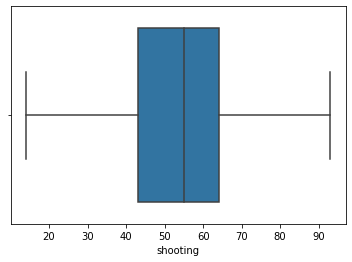

In [28]:
sns.boxplot(x=df['shooting']) #los porteros no tienen pace

In [29]:
outliers(df['shooting'])

'Hay 0 outliers por debajo de 11.5 y 0 outliers por encima de 95.5.'

### Variable passing

<AxesSubplot:xlabel='passing'>

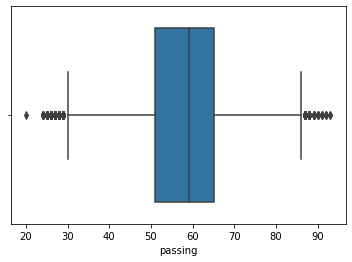

In [30]:
sns.boxplot(x=df['passing'])

In [31]:
outliers(df['passing'])

'Hay 380 outliers por debajo de 30.0 y 69 outliers por encima de 86.0.'